In [492]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [493]:
# 1. Membaca dataset
data = pd.read_excel('dataKasus-1.xlsx')

In [494]:
# 2. Menampilkan beberapa baris data untuk memastikan kolom yang benar
print(data.head())

   NO    NAMA   USIA  PARITAS JARAK KELAHIRAN RIW HIPERTENSI RIW PE OBESITAS  \
0   1  NAMA 1  23 TH        3       < 2 tahun          Tidak  Tidak    Tidak   
1   2  NAMA 2  29 TH        2       < 2 tahun          Tidak    PEB    Tidak   
2   3  NAMA 3  20 TH        1    anak pertama          Tidak  Tidak    Tidak   
3   4  NAMA 4  18 TH        1    anak pertama          Tidak  Tidak    Tidak   
4   5  NAMA 5  34 TH        3      > 2 tahun           Tidak  Tidak    Tidak   

  RIW DM RIW HIPERTENSI/PE DALAM KELUARGA SOSEK RENDAH PE/Non PE Unnamed: 12  
0     Ya                            Tidak         >UMR    Non PE         NaN  
1  Tidak                              Ada         >UMR        PE         NaN  
2  Tidak                            Tidak         >UMR    Non PE         NaN  
3  Tidak                            Tidak         >UMR    Non PE         NaN  
4  Tidak                            Tidak         >UMR    Non PE         NaN  


In [495]:
# Normalisasi format USIA
data['USIA'] = data['USIA'].astype(str)  # Mengubah menjadi string
data['USIA'] = data['USIA'].replace({'> 2 tahun': '3', '< 1 tahun': '0'})  # Gantilah nilai sesuai yang diinginkan
data['USIA'] = data['USIA'].str.replace(' TH', '', case=False)  # Menghapus ' TH' (dalam format apapun)
data['USIA'] = data['USIA'].str.replace(' th', '', case=False)  # Menghapus ' th' (dalam format apapun)
data['USIA'] = data['USIA'].str.replace(' tahun', '', case=False)  # Menghapus ' tahun' (dalam format apapun)

In [496]:
# Mengonversi kolom 'USIA' ke float setelah pembersihan
data['USIA'] = pd.to_numeric(data['USIA'], errors='coerce')  # Mengubah menjadi float dan mengabaikan error

In [497]:
# Memastikan kolom 'PARITAS' adalah tipe string sebelum melakukan penggantian
data['PARITAS'] = data['PARITAS'].astype(str)  # Mengubah menjadi string
data['PARITAS'] = data['PARITAS'].replace({'0': '0', '1': '1'})  # Gantilah nilai sesuai yang diinginkan
data['PARITAS'] = data['PARITAS'].astype(float)  # Mengubah menjadi numeric

In [498]:
# 4. Mengisi nilai NaN dengan median
data['USIA'] = data['USIA'].fillna(data['USIA'].median())  # Mengisi NaN dengan median
data['PARITAS'] = data['PARITAS'].fillna(data['PARITAS'].median())  # Mengisi NaN dengan median


In [499]:
# 5. Menyiapkan data untuk model
X = data[['USIA', 'PARITAS']]  # Fitur
y = data['PE/Non PE']  # Target

In [500]:
# 6. Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [501]:
# 7. Membangun model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [502]:
# 8. Menguji model
y_pred = model.predict(X_test)

In [503]:
# 9. Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy * 100:.2f}%')

Akurasi model: 90.27%


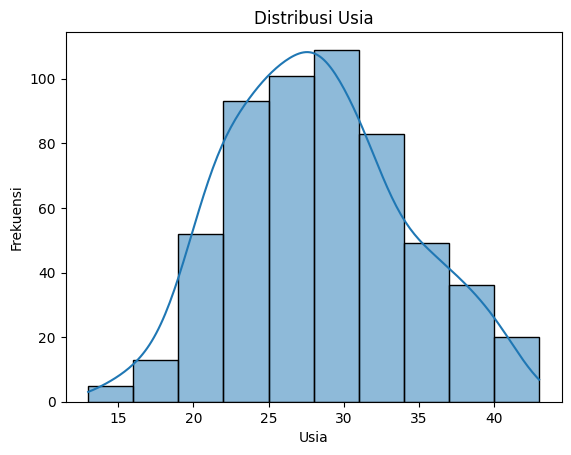

In [504]:
# Visualisasi distribusi usia
sns.histplot(data['USIA'], bins=10, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

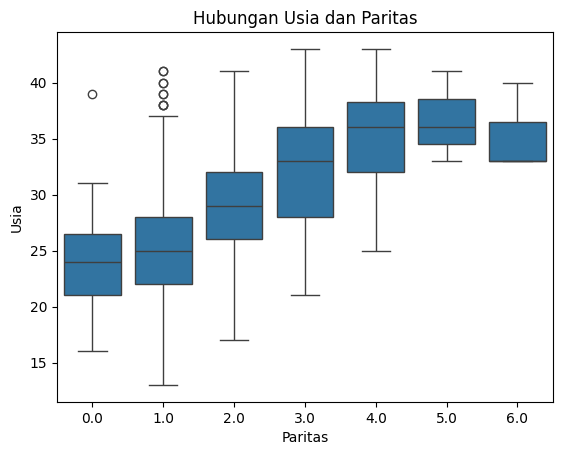

In [505]:
sns.boxplot(x='PARITAS', y='USIA', data=data)
plt.title('Hubungan Usia dan Paritas')
plt.xlabel('Paritas')
plt.ylabel('Usia')
plt.show()

In [506]:
# 11. Evaluasi Model
cm = confusion_matrix(y_test, y_pred)

In [507]:
# Mengambil label kelas dari y_test jika model.classes_ tidak sesuai
display_labels = np.unique(np.concatenate((y_test, y_pred)))

In [508]:
# Membuat objek matriks kebingungan
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

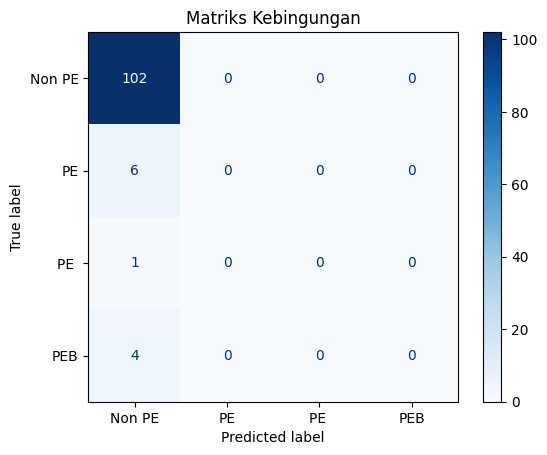

In [509]:
# Menampilkan matriks kebingungan
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriks Kebingungan')
plt.show()